<a href="https://colab.research.google.com/github/Ajay0110/Mobile-Price-Range-Prediction/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Importing libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings; warnings.simplefilter('ignore')

# Connecting Google Drive

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset path, shape, head and tail

In [3]:
# Setting up path
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/Unsupervised EDA Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
df.shape # To check the shape

(7787, 12)

In [5]:
df.head() # To get the first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.tail() # To get the last 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


# Data Cleaning

In [7]:
#checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are 2389 null values in director column, which when dropped makes a huge impact on the dataset. Therefore removing director column, inorder to maintain data consistency

In [8]:
# Removing director column
df.drop(['director'],axis=1,inplace=True)

Dropping rows with NULL

In [9]:
# Dropping null row wise
df.dropna(axis=0,inplace=True)

In [10]:
# Checking for null values, if any
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
# Dataset shape after removing NULL values
df.shape

(6643, 11)

In [12]:
# Splitting the country feature
df['country']=df['country'].apply(lambda x:x.split(","))

In [13]:
# Exploding country feature
df = df.explode('country')

In [14]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Removing left and right spaces

In [15]:
# Trimming left and right spaces
df['country'] = df['country'].str.lstrip()
df['country'] = df['country'].str.rstrip()

In [16]:
# Checking datatypes of features
df.dtypes

show_id         object
type            object
title           object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [17]:
# Converting date_added feature object to datetime datatype
df['date_added'] = pd.to_datetime(df['date_added'])

In [18]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Exploratory Data Analysis

### Number of movies and TV shows visualization

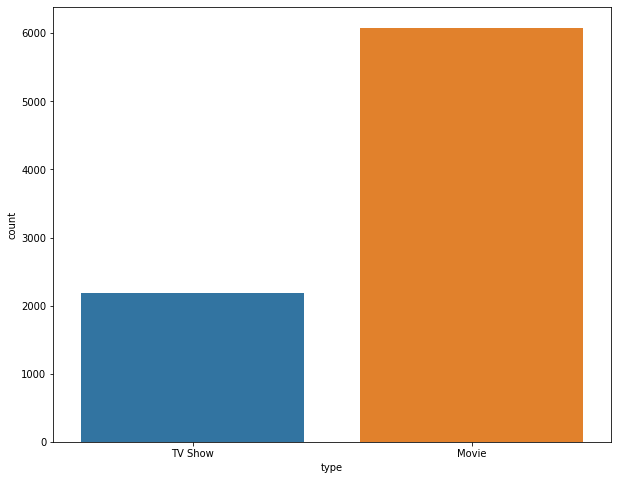

In [19]:
# Countplot for feature type
plt.figure(figsize = (10,8))
sns.countplot(df['type'])

The number of movies is high whereas TV shows is significantly low

### Top 5 Countries using Netflix

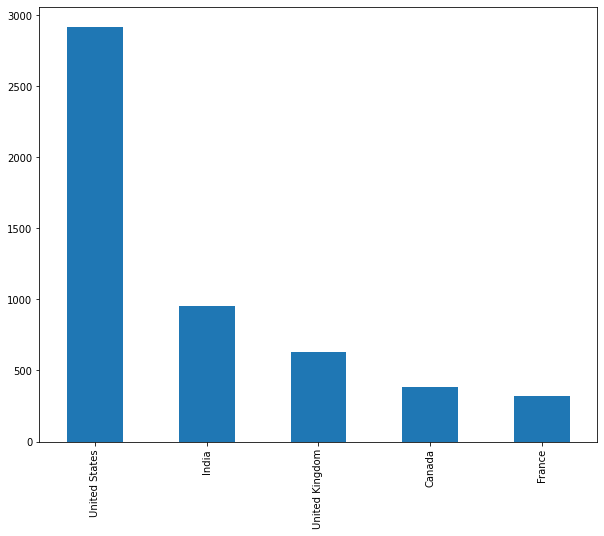

In [20]:
# Getting Top 5 countries
plt.figure(figsize = (10,8))
df['country'].value_counts().head().plot(kind='bar')

Here we can see the top 5 countries that use Netflix with United States at the top. Our India stands second in the usage, UK in the third place, Canada in fourth and at last France.



### Overall Top 5 programmes

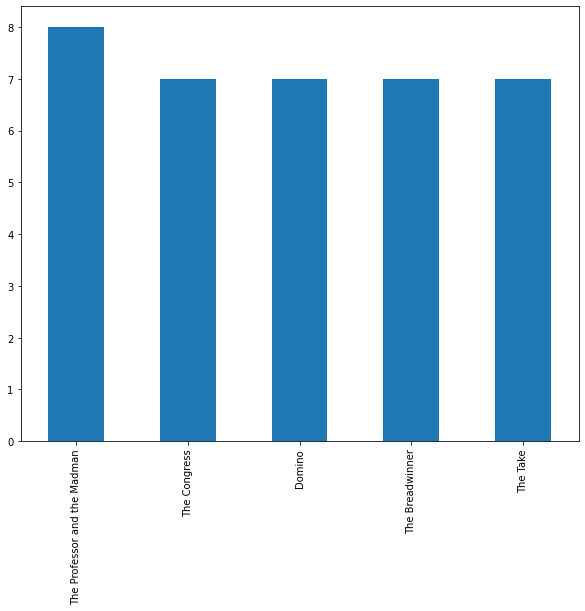

In [21]:
# Getting top 5 movies
plt.figure(figsize = (10,8))
df['title'].value_counts().head().plot(kind='bar')

Here are the top 5 programmes that are being featured in Netflix.

# For TV Shows

In [22]:
# TV Shows Dataframe
df1=df.loc[df['type']=='TV Show',:]

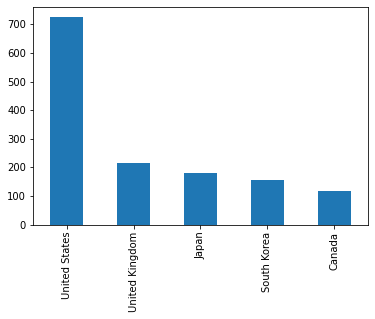

In [23]:
# Top 5 countries with feature the most TV Shows
df1['country'].value_counts().head().plot(kind='bar')

United States is the highest having around 700 TV shows.
Canada has the least number of TV shows. 

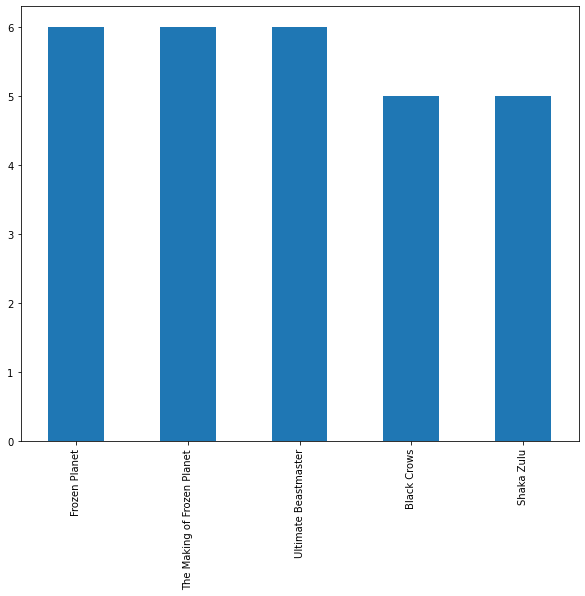

In [24]:
# Getting top 5 TV Shows
plt.figure(figsize = (10,8))
df1['title'].value_counts().head().plot(kind='bar')

Top 5 TV shows are Frozen Planet, The Making of the Frozen Planet, Ultimate Beastmaster, Black Crows and Shaka Zulu.

In [31]:
df1['cast']=df1['cast'].apply(lambda x:x.split(","))

In [32]:
df1 = df1.explode('cast')

In [33]:
# Trimming left and right spaces
df1['cast'] = df1['cast'].str.lstrip()
df1['cast'] = df1['cast'].str.rstrip()

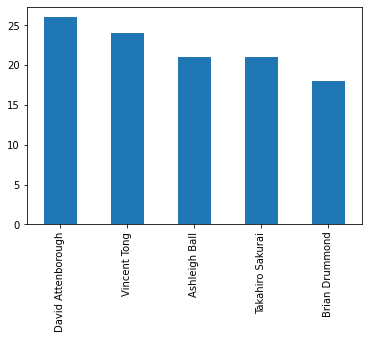

In [34]:
# Getting top 5 casts for TV Shows
plt.figure(figsize = (10,8))
df1['cast'].value_counts().head().plot(kind='bar')

In [ ]:
df1_us = df.loc[df['type']=='TV Show',:]